# • построить не менее 4 визуализаций различных видов;
# • каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
# • по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?)

In [114]:
import pandas as pd
df = pd.read_csv('IMDb movies.csv')
print(df.shape)

(85855, 22)


D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [115]:
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


# 1. Найдём, в какие годы наибольшее количество голосов у фильмов по данным IMDb.

### Сначала смотрим на самые ранние фильмы.

In [116]:
df1 = df[[x for x in df.columns if 'votes' in x] + ['year']]\
    .groupby('year').sum()
df1.head()

,votes
year,
1894,154
1906,589
1911,2833
1912,1658
1913,9828


### Теперь посмотрим на все годы, указанные в csv.

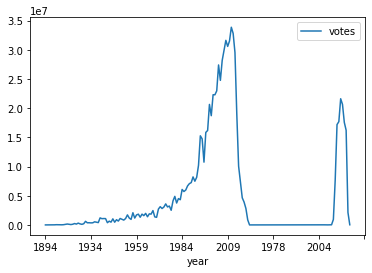

In [117]:
df1.plot()

### Делаем вывод, что в первые годы люди вовлекались в фильмы постепенно, и голосов с каждым годом становилось больше, однако были периоды, когда все шло на спад.

# 2. Найдём у суммарные рейтинг и длительность фильмов.

In [118]:
df2 = df[[x for x in df.columns if 'avg_vote' in x] + ['year'] + ['duration']]\
    .groupby('year').sum()
df2.head()

,avg_vote,duration
year,,
1894,5.9,45
1906,6.1,70
1911,30.7,351
1912,29.9,380
1913,85.1,1121


Text(0, 0.5, 'средний рейтинг')

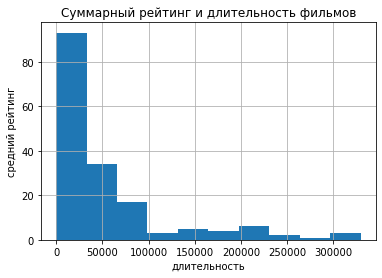

In [119]:
ax = df2.duration.hist(bins = 10)
ax.set_title('Суммарный рейтинг и длительность фильмов')
ax.set_xlabel('длительность')
ax.set_ylabel('средний рейтинг')

### Делаем вывод, что у малого количества фильмов высокий рейтиг (или множества коротких). Что значит, что хороших фильмов с хорошим рейтингои намного меньше, чем плохих.

# 3. Посмотрим, в какие годы наибольшая длительность фильмов (или наибольшее кол-во фильмов).

In [120]:
df3 = df.groupby('year')[['duration']].sum()\
    .sort_values('duration', ascending=False).head(10)
    
df3

,duration
year,
2017,329504
2018,328669
2016,305390
2015,280863
2014,255758
2011,237562
2009,230115
2010,228469
2019,226166


In [121]:
df3.style.bar()

,duration
year,
2017,329504
2018,328669
2016,305390
2015,280863
2014,255758
2011,237562
2009,230115
2010,228469
2019,226166


### Делаем вывод, что самый богатый год на фильмы - 2017.

# 4. Посмотрим фильмы на каких языках набирают наибольшее кол-во голосов.

In [122]:
df4 = df.groupby('language')[['votes']].sum()\
    .sort_values('votes', ascending=False).head(10)

df4

,votes
language,
English,392271069
"English, Spanish",46959664
"English, French",28353826
"English, Russian",9857455
"English, German",9312967
"English, Italian",8688437
Hindi,8329169
Japanese,8290466
"English, Mandarin",7388180


In [131]:
df4.style.bar()

,votes
language,
English,392271069
"English, Spanish",46959664
"English, French",28353826
"English, Russian",9857455
"English, German",9312967
"English, Italian",8688437
Hindi,8329169
Japanese,8290466
"English, Mandarin",7388180


### Видим, что самые популярные фильмы - на английском.

# 5. Посмотрим, как критики оценивают фильмы.

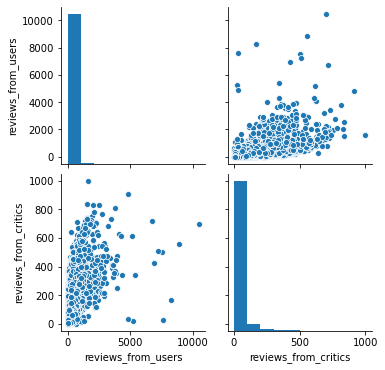

In [129]:
import seaborn as sns

sns_plot = sns.pairplot(
    df[['reviews_from_users', 'reviews_from_critics']])
sns_plot

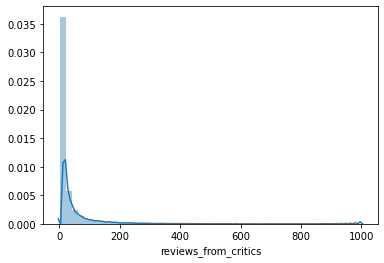

In [130]:
sns.distplot(df.reviews_from_critics)

### Видим, что чаще всего критики не так высоко оценивают фильмы.